In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import EAtools as ea
import pandas as pd
import os   
import sys 
import numpy
import fileinput
import matplotlib.pyplot as plt 
import matplotlib.ticker  
from matplotlib.ticker import FormatStrFormatter 
import pandas.io.sql
import pyodbc 
from matplotlib.pyplot import figure, show
from matplotlib.patches import Ellipse
import numpy as np
from pandas import *
import EAtools as ea
ea.set_options()
ea.ea_report_style()
from pylab import *
import matplotlib.ticker as tkr
from datetime import datetime, date, time, timedelta
ea_p=ea.ea_p
ea_s=ea.ea_s
def cm2inch(value):
    return value/2.54
import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
from db import DB
import os
ea.set_options()
ea.ea_report_style()
%pylab inline
%matplotlib inline
path='/media/usb/notebooks/Julia/20192020_review'
db = DB(profile="hallj") 

Populating the interactive namespace from numpy and matplotlib


/home/julia/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'datetime', 'linalg', 'fft', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
meridian_watervalues = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/meridian_watervalues.parquet")
mercury_watervalues = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/mercury_watervalues.parquet")
genesis_watervalues = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/genesis_watervalues.parquet")
DOASA_watervalues = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/DOASA_avg_watervalue.parquet")
#meridian_watervalues.tail()

In [4]:
#match in percent of offers over 300
waitaki_300 = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/waitaki_percent300_v2.parquet")
waikato_300 = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/waikato_percent300_v2.parquet")
tekapo_300 = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/tekapo_percent300_v2.parquet")
clutha_300 = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/clutha_percent300_v2.parquet")
waitaki_300.head()

Megawatt     TotMW    percent
TradingDate TradingPeriod                               
2014-01-01  1               439.313  1356.313  32.390237
            2               450.825  1351.825  33.349361
            3               442.055  1347.055  32.816403
            4               490.522  1367.522  35.869405
            5               513.509  1369.509  37.495847

In [5]:
#match in QWOP with offers over 300 removed
waitaki_QWOPexc = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/waitaki_QWOPexc_v2.parquet")
waikato_QWOPexc = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/waikato_QWOPexc_v2.parquet")
tekapo_QWOPexc = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/tekapo_QWOPexc_v2.parquet")
clutha_QWOPexc = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/clutha_QWOPexc_v2.parquet")
waitaki_QWOPexc = waitaki_QWOPexc.rename(columns={'WeightstarPrice':'WeightstarPrice_exc300'})
waikato_QWOPexc = waikato_QWOPexc.rename(columns={'WeightstarPrice':'WeightstarPrice_exc300'})
tekapo_QWOPexc = tekapo_QWOPexc.rename(columns={'WeightstarPrice':'WeightstarPrice_exc300'})
clutha_QWOPexc = clutha_QWOPexc.rename(columns={'WeightstarPrice':'WeightstarPrice_exc300'})
waitaki_QWOPexc.head()

WeightstarPrice_exc300
TradingDate TradingPeriod                        
2014-01-01  1                           12.505573
            2                           12.727114
            3                           12.670994
            4                           13.074584
            5                           13.394603

In [6]:
#match in QWOP
waitaki_QWOP = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/waitaki_v2.parquet")
waikato_QWOP = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/waikato_v2.parquet")
tekapo_QWOP = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/tekapo_v2.parquet")
clutha_QWOP = pd.read_parquet("/media/usb/notebooks/Julia/20192020_review/clutha_v2.parquet")
waitaki_QWOP.head()

WeightstarPrice
TradingDate TradingPeriod                 
2014-01-01  1                   324.259802
            2                   333.638973
            3                   328.472761
            4                   358.111504
            5                   373.956692

In [9]:
MERI = waitaki_300.join(waitaki_QWOPexc).join(waitaki_QWOP)
MRPL = waikato_300.join(waikato_QWOPexc).join(waikato_QWOP)
GENE = tekapo_300.join(tekapo_QWOPexc).join(tekapo_QWOP)
CTCT = clutha_300.join(clutha_QWOPexc).join(clutha_QWOP)

In [10]:
GENE.head()

Megawatt  TotMW    percent  WeightstarPrice_exc300  WeightstarPrice
TradingDate TradingPeriod                                                                     
2014-01-01  1                   0.0  150.0   0.000000                1.286933         1.286933
            2                  65.0  150.0  43.333333                1.792941       867.717333
            3                  65.0  150.0  43.333333                1.792941       867.717333
            4                  65.0  150.0  43.333333                1.792941       867.717333
            5                  65.0  150.0  43.333333                1.792941       867.717333

In [11]:
CTCT.head()

Megawatt   TotMW  percent  WeightstarPrice_exc300  WeightstarPrice
TradingDate TradingPeriod                                                                    
2014-01-01  1                   0.0  670.01      0.0               27.419815        27.419815
            2                   0.0  670.01      0.0               27.419815        27.419815
            3                   0.0  670.01      0.0               27.419815        27.419815
            4                   0.0  645.01      0.0               24.761709        24.761709
            5                   0.0  645.01      0.0               24.761709        24.761709

In [12]:
MRPL.head()

Megawatt    TotMW   percent  WeightstarPrice_exc300  WeightstarPrice
TradingDate TradingPeriod                                                                      
2014-01-01  1                  0.00  760.000  0.000000              109.338224       109.338224
            2                  7.00  926.011  0.755931              121.959949       137.668489
            3                  9.00  935.000  0.962567              124.025616       144.008257
            4                  9.00  935.000  0.962567              129.885799       149.812032
            5                  8.61  928.610  0.927192              130.129598       149.321276

In [13]:
MERI.head()

Megawatt     TotMW    percent  WeightstarPrice_exc300  WeightstarPrice
TradingDate TradingPeriod                                                                        
2014-01-01  1               439.313  1356.313  32.390237               12.505573       324.259802
            2               450.825  1351.825  33.349361               12.727114       333.638973
            3               442.055  1347.055  32.816403               12.670994       328.472761
            4               490.522  1367.522  35.869405               13.074584       358.111504
            5               513.509  1369.509  37.495847               13.394603       373.956692

In [14]:
MERI = MERI.reset_index().set_index(['TradingDate'])
MRPL = MRPL.reset_index().set_index(['TradingDate'])
GENE = GENE.reset_index().set_index(['TradingDate'])
CTCT = CTCT.reset_index().set_index(['TradingDate'])

In [15]:
genesis_watervalues = genesis_watervalues.rename(columns={'WeightstarPrice':'WaterValue'})

In [18]:
MERI = meridian_watervalues.join(MERI,how='right').join(DOASA_watervalues,how='left')
MRPL = mercury_watervalues.join(MRPL,how='right').join(DOASA_watervalues,how='left')
GENE = genesis_watervalues.join(GENE,how='right').join(DOASA_watervalues,how='left')
CTCT = CTCT.join(DOASA_watervalues,how='left')
MERI.head()

,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
2014-01-01,NaN,1,439.313,1356.313,32.390237,12.505573,324.259802,NaN
2014-01-01,NaN,2,450.825,1351.825,33.349361,12.727114,333.638973,NaN
2014-01-01,NaN,3,442.055,1347.055,32.816403,12.670994,328.472761,NaN
2014-01-01,NaN,4,490.522,1367.522,35.869405,13.074584,358.111504,NaN
2014-01-01,NaN,5,513.509,1369.509,37.495847,13.394603,373.956692,NaN


# correlations

In [22]:
MERI['2016/1/6':'2018/9/30'].corr(method='spearman')

,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
WaterValue,1.000000,-0.000002,0.023942,0.100361,0.016722,0.255030,0.031420,0.559460
TradingPeriod,-0.000002,1.000000,-0.298532,0.080542,-0.312075,-0.235219,-0.306781,0.000247
Megawatt,0.023942,-0.298532,1.000000,0.247158,0.994911,0.500218,0.983384,0.203704
TotMW,0.100361,0.080542,0.247158,1.000000,0.164040,-0.018735,0.160917,0.301959
percent,0.016722,-0.312075,0.994911,0.164040,1.000000,0.516063,0.988790,0.181426
WeightstarPrice_exc300,0.255030,-0.235219,0.500218,-0.018735,0.516063,1.000000,0.547806,0.092048
WeightstarPrice,0.031420,-0.306781,0.983384,0.160917,0.988790,0.547806,1.000000,0.190236
marginal_H20_value,0.559460,0.000247,0.203704,0.301959,0.181426,0.092048,0.190236,1.000000


In [23]:
MERI['2019/1/1':'2021/3/31'].corr(method='spearman')

,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
WaterValue,1.000000,-0.000158,0.036670,0.004653,0.037596,0.505319,-0.087580,0.791397
TradingPeriod,-0.000158,1.000000,-0.295890,0.023537,-0.305904,-0.048117,-0.280763,0.000137
Megawatt,0.036670,-0.295890,1.000000,0.279105,0.994288,0.267611,0.871251,-0.008581
TotMW,0.004653,0.023537,0.279105,1.000000,0.190313,0.133126,0.287630,0.021484
percent,0.037596,-0.305904,0.994288,0.190313,1.000000,0.260947,0.862330,-0.010165
WeightstarPrice_exc300,0.505319,-0.048117,0.267611,0.133126,0.260947,1.000000,0.327323,0.233938
WeightstarPrice,-0.087580,-0.280763,0.871251,0.287630,0.862330,0.327323,1.000000,-0.216562
marginal_H20_value,0.791397,0.000137,-0.008581,0.021484,-0.010165,0.233938,-0.216562,1.000000


In [24]:
MRPL['2016/1/1':'2018/9/30'].corr(method='spearman')

,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
WaterValue,1.000000,0.000113,0.090417,-0.065169,0.080266,0.187750,0.149453,0.333138
TradingPeriod,0.000113,1.000000,-0.007862,-0.031329,-0.007714,-0.298789,-0.224717,0.000246
Megawatt,0.090417,-0.007862,1.000000,0.332509,0.996793,-0.255611,0.764581,0.437369
TotMW,-0.065169,-0.031329,0.332509,1.000000,0.290802,-0.121110,0.236994,0.085408
percent,0.080266,-0.007714,0.996793,0.290802,1.000000,-0.260654,0.765141,0.435911
WeightstarPrice_exc300,0.187750,-0.298789,-0.255611,-0.121110,-0.260654,1.000000,0.300692,-0.113565
WeightstarPrice,0.149453,-0.224717,0.764581,0.236994,0.765141,0.300692,1.000000,0.322663
marginal_H20_value,0.333138,0.000246,0.437369,0.085408,0.435911,-0.113565,0.322663,1.000000


In [23]:
MRPL['2019/1/1':'2021/3/31'].corr(method='spearman')

,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
WaterValue,1.000000,0.000315,0.120213,0.028285,0.127819,-0.016932,0.398027,0.448709
TradingPeriod,0.000315,1.000000,-0.433580,-0.089824,-0.438439,-0.337443,-0.257969,0.000137
Megawatt,0.120213,-0.433580,1.000000,0.336125,0.989757,0.490504,0.712124,0.080830
TotMW,0.028285,-0.089824,0.336125,1.000000,0.212620,0.132090,0.068743,-0.179225
percent,0.127819,-0.438439,0.989757,0.212620,1.000000,0.491920,0.731058,0.114469
WeightstarPrice_exc300,-0.016932,-0.337443,0.490504,0.132090,0.491920,1.000000,0.274418,0.093539
WeightstarPrice,0.398027,-0.257969,0.712124,0.068743,0.731058,0.274418,1.000000,0.138533
marginal_H20_value,0.448709,0.000137,0.080830,-0.179225,0.114469,0.093539,0.138533,1.000000


In [24]:
#use for Genesis's water value
GENE['2016/10/1':'2018/9/30'].corr(method='spearman')

,MWtimesdollars,VOLUME,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
MWtimesdollars,1.000000,0.902027,0.663610,-0.000547,0.548368,0.255479,0.546311,0.112151,0.408587,0.431862
VOLUME,0.902027,1.000000,0.468587,0.000015,0.398526,0.253419,0.395690,0.056296,0.263842,0.507593
WaterValue,0.663610,0.468587,1.000000,-0.000841,0.463941,0.486360,0.461866,0.551206,0.733836,-0.134406
TradingPeriod,-0.000547,0.000015,-0.000841,1.000000,-0.040291,-0.070774,-0.039312,0.011905,-0.053707,0.000549
Megawatt,0.548368,0.398526,0.463941,-0.040291,1.000000,0.276870,0.999122,-0.046398,0.564106,0.079466
TotMW,0.255479,0.253419,0.486360,-0.070774,0.276870,1.000000,0.261914,0.559702,0.529675,-0.167655
percent,0.546311,0.395690,0.461866,-0.039312,0.999122,0.261914,1.000000,-0.049659,0.563692,0.077506
WeightstarPrice_exc300,0.112151,0.056296,0.551206,0.011905,-0.046398,0.559702,-0.049659,1.000000,0.735383,-0.287638
WeightstarPrice,0.408587,0.263842,0.733836,-0.053707,0.564106,0.529675,0.563692,0.735383,1.000000,-0.263720
marginal_H20_value,0.431862,0.507593,-0.134406,0.000549,0.079466,-0.167655,0.077506,-0.287638,-0.263720,1.000000


In [25]:
#use for DOASA water value
GENE['2016/1/1':'2018/9/30'].corr(method='spearman')

,MWtimesdollars,VOLUME,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
MWtimesdollars,1.000000,0.902027,0.663610,-0.000547,0.548368,0.255479,0.546311,0.112151,0.408587,0.431862
VOLUME,0.902027,1.000000,0.468587,0.000015,0.398526,0.253419,0.395690,0.056296,0.263842,0.507593
WaterValue,0.663610,0.468587,1.000000,-0.000841,0.463941,0.486360,0.461866,0.551206,0.733836,-0.134406
TradingPeriod,-0.000547,0.000015,-0.000841,1.000000,-0.032622,-0.062406,-0.031945,-0.016319,-0.064577,0.000507
Megawatt,0.548368,0.398526,0.463941,-0.032622,1.000000,0.280908,0.999449,-0.062227,0.482758,0.203720
TotMW,0.255479,0.253419,0.486360,-0.062406,0.280908,1.000000,0.269536,0.394102,0.401070,-0.132151
percent,0.546311,0.395690,0.461866,-0.031945,0.999449,0.269536,1.000000,-0.064910,0.482563,0.202244
WeightstarPrice_exc300,0.112151,0.056296,0.551206,-0.016319,-0.062227,0.394102,-0.064910,1.000000,0.791108,-0.305757
WeightstarPrice,0.408587,0.263842,0.733836,-0.064577,0.482758,0.401070,0.482563,0.791108,1.000000,-0.224134
marginal_H20_value,0.431862,0.507593,-0.134406,0.000507,0.203720,-0.132151,0.202244,-0.305757,-0.224134,1.000000


In [26]:
GENE['2019/1/1':'2021/3/31'].corr(method='spearman')

,MWtimesdollars,VOLUME,WaterValue,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
MWtimesdollars,1.000000,0.480159,0.909272,-0.000491,0.453846,0.406415,0.422421,0.573077,0.468315,0.608455
VOLUME,0.480159,1.000000,0.203227,0.000027,0.072785,-0.027799,0.068516,0.331188,0.085532,0.148434
WaterValue,0.909272,0.203227,1.000000,-0.000543,0.527808,0.477426,0.494856,0.636550,0.546105,0.561445
TradingPeriod,-0.000491,0.000027,-0.000543,1.000000,-0.096122,-0.032181,-0.096218,0.156125,-0.084764,0.000427
Megawatt,0.453846,0.072785,0.527808,-0.096122,1.000000,0.315767,0.983680,0.255603,0.974200,0.078042
TotMW,0.406415,-0.027799,0.477426,-0.032181,0.315767,1.000000,0.198515,0.500086,0.226634,0.200025
percent,0.422421,0.068516,0.494856,-0.096218,0.983680,0.198515,1.000000,0.203081,0.989303,0.060035
WeightstarPrice_exc300,0.573077,0.331188,0.636550,0.156125,0.255603,0.500086,0.203081,1.000000,0.296278,0.341004
WeightstarPrice,0.468315,0.085532,0.546105,-0.084764,0.974200,0.226634,0.989303,0.296278,1.000000,0.090901
marginal_H20_value,0.608455,0.148434,0.561445,0.000427,0.078042,0.200025,0.060035,0.341004,0.090901,1.000000


In [27]:
CTCT['2016/1/1':'2018/9/30'].corr(method='spearman')

,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
TradingPeriod,1.000000,-0.072013,-0.102023,-0.072510,-0.168389,-0.173270,0.000246
Megawatt,-0.072013,1.000000,0.235103,0.999663,-0.342188,0.837246,0.680094
TotMW,-0.102023,0.235103,1.000000,0.222468,0.092400,0.283493,0.087482
percent,-0.072510,0.999663,0.222468,1.000000,-0.345547,0.837381,0.680415
WeightstarPrice_exc300,-0.168389,-0.342188,0.092400,-0.345547,1.000000,0.091826,-0.130310
WeightstarPrice,-0.173270,0.837246,0.283493,0.837381,0.091826,1.000000,0.581712
marginal_H20_value,0.000246,0.680094,0.087482,0.680415,-0.130310,0.581712,1.000000


In [28]:
CTCT['2019/1/1':'2021/3/31'].corr(method='spearman')

,TradingPeriod,Megawatt,TotMW,percent,WeightstarPrice_exc300,WeightstarPrice,marginal_H20_value
TradingPeriod,1.000000,-0.284155,-0.070354,-0.281284,-0.093538,-0.247979,0.000137
Megawatt,-0.284155,1.000000,0.218545,0.996345,-0.256695,0.888567,0.315246
TotMW,-0.070354,0.218545,1.000000,0.152702,0.033138,0.211423,-0.155604
percent,-0.281284,0.996345,0.152702,1.000000,-0.266310,0.883622,0.329415
WeightstarPrice_exc300,-0.093538,-0.256695,0.033138,-0.266310,1.000000,-0.218696,-0.069476
WeightstarPrice,-0.247979,0.888567,0.211423,0.883622,-0.218696,1.000000,0.270193
marginal_H20_value,0.000137,0.315246,-0.155604,0.329415,-0.069476,0.270193,1.000000


# plot QWOPs and watervalues

In [39]:
GENE.WeightstarPrice_exc300.describe()

count    121561.000000
mean         25.584433
std          56.565043
min          -0.001926
25%           0.010000
50%           7.440645
75%          18.456450
max         298.080000
Name: WeightstarPrice_exc300, dtype: float64

In [ ]:
#all its offers are priced over $300/MWh in some trading periods, so the WeightstarPrice_exc300 is NA

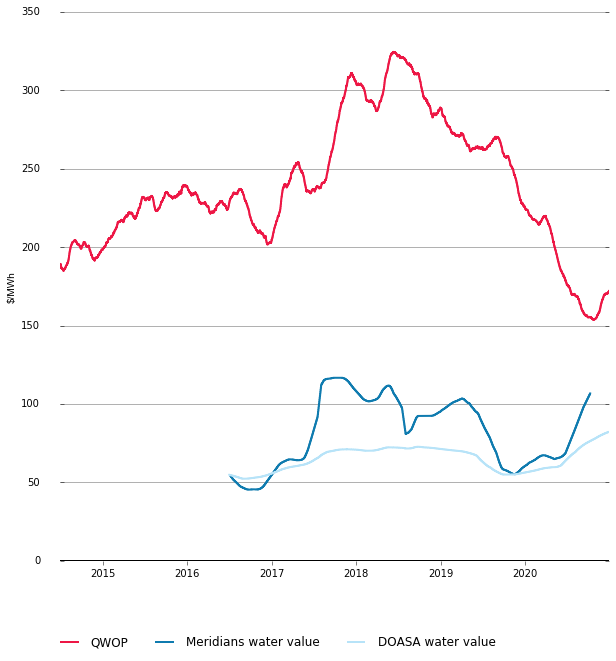

In [27]:
fig = plt.figure(23,figsize=[cm2inch(25),cm2inch(25)])

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(111)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(MERI.index, MERI['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns2=ax.plot(MERI.index, MERI['WaterValue'].rolling(48*365,center=True).mean(), label='Meridians water value',color=(ea_p['bl1']) )
lns3=ax.plot(MERI.index, MERI['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s
setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12)

plt.savefig(path +'/pics/Meridian_QWOP_v_watervalues.png', dpi=500, format='png', bbox_inches='tight')

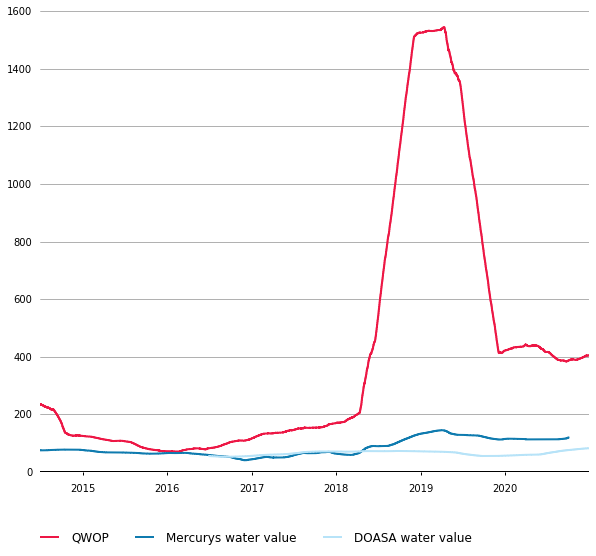

In [21]:
fig = plt.figure(23,figsize=[cm2inch(25),cm2inch(25)])

ax=fig.add_subplot(111)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(MRPL.index, MRPL['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(MRPL.index, MRPL['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12)

plt.savefig(path +'/pics/Mercury_QWOP_v_watervalues.png', dpi=500, format='png', bbox_inches='tight')

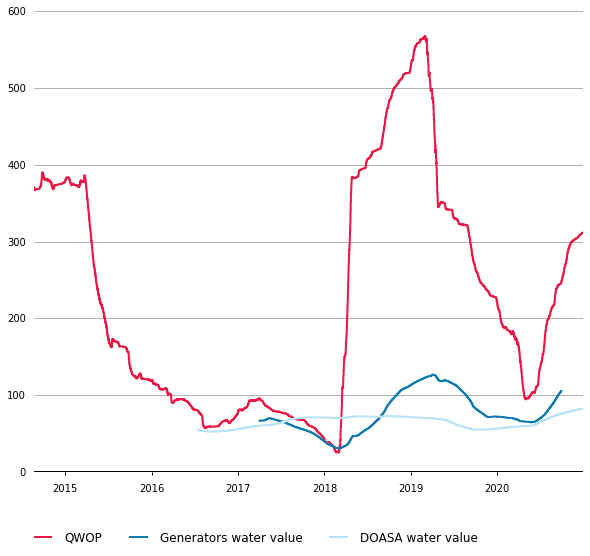

In [23]:
fig = plt.figure(23,figsize=[cm2inch(25),cm2inch(25)])
ax=fig.add_subplot(111)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(GENE.index, GENE['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns2=ax.plot(GENE.index, GENE['WaterValue'].rolling(48*365,center=True).mean(), label='Generators water value',color=(ea_p['bl1']) )
lns3=ax.plot(GENE.index, GENE['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12)


plt.savefig(path +'/pics/Genesis_QWOP_v_watervalues.png', dpi=500, format='png', bbox_inches='tight')

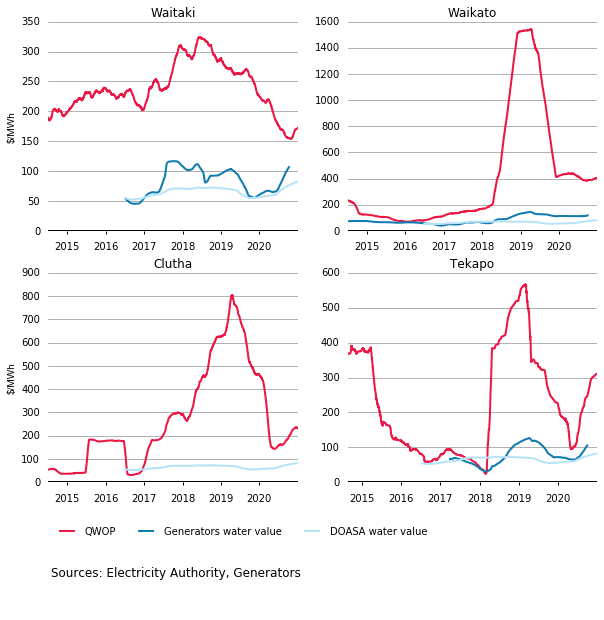

In [27]:
#do hydro ones as panels in the same chart

fig = plt.figure(23,figsize=[cm2inch(25),cm2inch(25)])

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(221)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(MERI.index, MERI['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns2=ax.plot(MERI.index, MERI['WaterValue'].rolling(48*365,center=True).mean(), label='Meridians water value',color=(ea_p['bl1']) )
lns3=ax.plot(MERI.index, MERI['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s
setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12).set_visible(False)
plt.title('Waitaki',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(222)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(MRPL.index, MRPL['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(MRPL.index, MRPL['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12).set_visible(False)
plt.title('Waikato',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(223)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(CTCT.index, CTCT['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
#lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(CTCT.index, CTCT['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )


ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.05),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=10).set_visible(False)
plt.title('Clutha',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(224)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(GENE.index, GENE['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns2=ax.plot(GENE.index, GENE['WaterValue'].rolling(48*365,center=True).mean(), label='Generators water value',color=(ea_p['bl1']) )
lns3=ax.plot(GENE.index, GENE['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-1.2, -0.30),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=10)
plt.title('Tekapo',x=0.5, y=1)

an1=ax.annotate("Sources: Electricity Authority, Generators",
           xy=(0.27, 0.1), xycoords='figure fraction',color='k',
            xytext=(.145-0.06
                , 0.07), textcoords='figure fraction',
              fontsize=12)

plt.savefig(path +'/pics/QWOPs_v_watervalues.png', dpi=500, format='png', bbox_inches='tight')

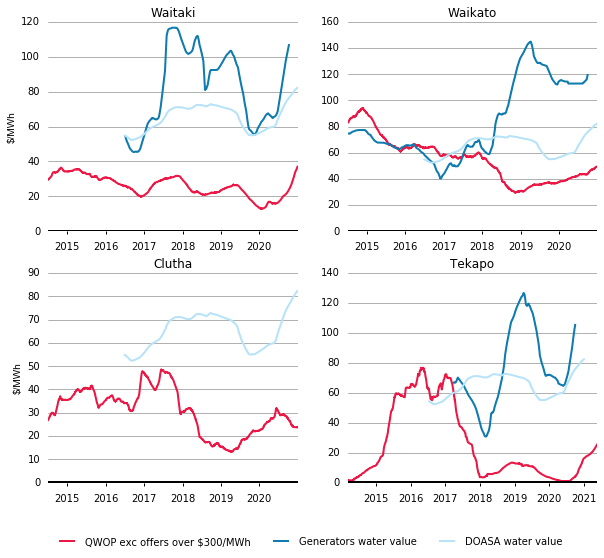

In [29]:
#do hydro ones as panels in the same chart

fig = plt.figure(23,figsize=[cm2inch(25),cm2inch(25)])

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(221)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(MERI.index, MERI['WeightstarPrice_exc300'].rolling(48*365,center=True).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd1']) )
lns2=ax.plot(MERI.index, MERI['WaterValue'].rolling(48*365,center=True).mean(), label='Meridians water value',color=(ea_p['bl1']) )
lns3=ax.plot(MERI.index, MERI['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s
setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12).set_visible(False)
plt.title('Waitaki',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(222)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(MRPL.index, MRPL['WeightstarPrice_exc300'].rolling(48*365,center=True).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd1']) )
lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(MRPL.index, MRPL['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12).set_visible(False)
plt.title('Waikato',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(223)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(CTCT.index, CTCT['WeightstarPrice_exc300'].rolling(48*365,center=True).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd1']) )
#lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(CTCT.index, CTCT['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )


ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.05),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=10).set_visible(False)
plt.title('Clutha',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(224)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns1=ax.plot(GENE.index, GENE['WeightstarPrice_exc300'].rolling(48*365,center=True,min_periods=48*200).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd1']) )
lns2=ax.plot(GENE.index, GENE['WaterValue'].rolling(48*365,center=True).mean(), label='Generators water value',color=(ea_p['bl1']) )
lns3=ax.plot(GENE.index, GENE['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-1.2, -0.35),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=10)
plt.title('Tekapo',x=0.5, y=1)



plt.savefig(path +'/pics/QWOPs_exc300_v_watervalues.png', dpi=500, format='png', bbox_inches='tight')

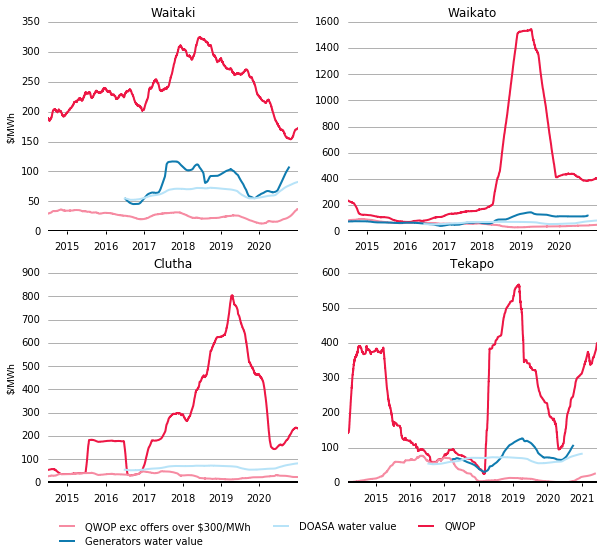

In [30]:
#do hydro ones as panels in the same chart

fig = plt.figure(23,figsize=[cm2inch(25),cm2inch(25)])

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(221)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns4=ax.plot(MERI.index, MERI['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns1=ax.plot(MERI.index, MERI['WeightstarPrice_exc300'].rolling(48*365,center=True).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd2']) )
lns2=ax.plot(MERI.index, MERI['WaterValue'].rolling(48*365,center=True).mean(), label='Meridians water value',color=(ea_p['bl1']) )
lns3=ax.plot(MERI.index, MERI['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s
setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12).set_visible(False)
plt.title('Waitaki',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(222)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns4=ax.plot(MRPL.index, MRPL['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']) )
lns1=ax.plot(MRPL.index, MRPL['WeightstarPrice_exc300'].rolling(48*365,center=True).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd2']) )
lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(MRPL.index, MRPL['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10 )
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.15),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=12).set_visible(False)
plt.title('Waikato',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(223)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25

lns4=ax.plot(CTCT.index, CTCT['WeightstarPrice'].rolling(48*365,center=True).mean(), label='QWOP',color=(ea_p['rd1']))
lns1=ax.plot(CTCT.index, CTCT['WeightstarPrice_exc300'].rolling(48*365,center=True).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd2']))
#lns2=ax.plot(MRPL.index, MRPL['WaterValue'].rolling(48*365,center=True).mean(), label='Mercurys water value',color=(ea_p['bl1']) )
lns3=ax.plot(CTCT.index, CTCT['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )


ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 )
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
lns = lns1+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.33+0.05),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=10).set_visible(False)
plt.title('Clutha',x=0.5, y=1)

#----------------------------------------------------------------------------------------------------------------------

ax=fig.add_subplot(224)

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=7.8
plt.rcParams['ytick.major.pad']=7.8
mpl.rcParams['figure.subplot.bottom']=0.25


lns4=ax.plot(GENE.index, GENE['WeightstarPrice'].rolling(48*365,center=True,min_periods=48*200).mean(), label='QWOP',color=(ea_p['rd1']))
lns1=ax.plot(GENE.index, GENE['WeightstarPrice_exc300'].rolling(48*365,center=True,min_periods=48*200).mean(), label='QWOP exc offers over $300/MWh',color=(ea_p['rd2']) )
lns2=ax.plot(GENE.index, GENE['WaterValue'].rolling(48*365,center=True).mean(), label='Generators water value',color=(ea_p['bl1']) )
lns3=ax.plot(GENE.index, GENE['marginal_H20_value'].rolling(48*365,center=True).mean(), label='DOASA water value',color=(ea_p['bl2']) )

ax.xaxis.tick_bottom()
ax.set_frame_on(False)
ax.axhline(y=0.1, lw=2, color='k') 
ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')
ax.set_axisbelow(True)
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(yearsFmt)
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

setp(ax.get_xticklabels(),  rotation =0, fontsize=10)
setp(ax.get_yticklabels(),  fontsize=10)
ax.set_ylabel(r"$/MWh", fontsize=10,  family='arial', rotation=90 ).set_visible(False)
ax.set_xlabel('Date', fontsize=10,family='arial').set_visible(False)
#lns = lns1+lns2
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-1.2, -0.35),fancybox=False, shadow=False, 
              frameon=False ,ncol=3, fontsize=10)
plt.title('Tekapo',x=0.5, y=1)



plt.savefig(path +'/pics/QWOPs_both_v_watervalues.png', dpi=500, format='png', bbox_inches='tight')